In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [10]:
# Reading the dataset
df = pd.read_csv('news.csv')

In [11]:
# Getting dimensions of the dataset
df.shape

(6335, 4)

In [12]:
# Getting first 5 rows of the dataset
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [13]:
# Here, there's a column named 'Unnamed: 0', it refers to the article ID to which the given data belongs to
# This column actually has no real use for our model, so let's drop it
df.drop('Unnamed: 0', axis = 1, inplace = True)


In [14]:
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [15]:
# Now, let's check for null values in the dataset
df.isnull().sum()


title    0
text     0
label    0
dtype: int64

In [ ]:
# Since the are no null values, we can proceed further
# Now, let's assume we have an article with very few words
# If we include such smaller text articles into our model,
# we could easily run into accuracy problems with our model.
# So let's handle them

In [16]:
# First, let's add a column 'length' to our DataFrame
# This column indicates the length of the 'text' it corresponds to
df['length'] = [len(str(text)) for text in df['text']]


In [17]:
df.head()

,title,text,label,length
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840


In [18]:
# Let's assume a threshold of length 50, we'll drop any article with text less than 50 characters
print("Number of articles which have less than 50 characters:", len(df[df['length'] < 50]))

Number of articles which have less than 50 characters: 45


In [19]:
 #As we saw above, we have 45 rows with text length less than 50. Let's drop them from the table
df.drop(df['text'][df['length'] < 50].index, axis = 0, inplace = True)

In [20]:
# The dimensions of the dataset after dropping them
df.shape

(6290, 4)

In [21]:
# Now, let's cross-verify if the DataFrame has any articles with less than 50 characters in it's text
print("Number of articles which have less than 50 characters:", len(df[df['length'] < 50]))


Number of articles which have less than 50 characters: 0


In [23]:
# Let's visualize the number of Fake and Real news
plt.figure(figsize = (20, 5), dpi = 96)

<Figure size 1920x480 with 0 Axes>

<Figure size 1920x480 with 0 Axes>

Text(0.5, 1.0, 'Counts of labels')

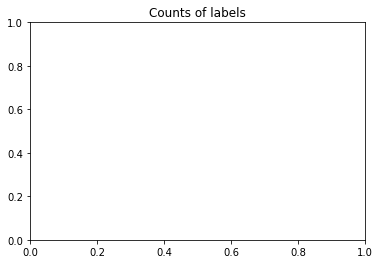

In [24]:
plt.title("Counts of labels")

<AxesSubplot:xlabel='label', ylabel='count'>

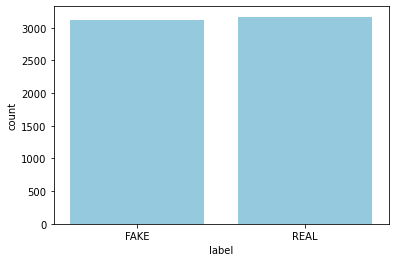

In [25]:
sns.countplot(x = 'label', data = df, color = 'skyblue')

In [26]:
plt.show()

In [27]:
# Let's visualize the distribution of the 'length' column
plt.figure(figsize = (20, 5), dpi = 96)

<Figure size 1920x480 with 0 Axes>

<Figure size 1920x480 with 0 Axes>

Text(0.5, 1.0, 'Distribution of the lengths of texts')

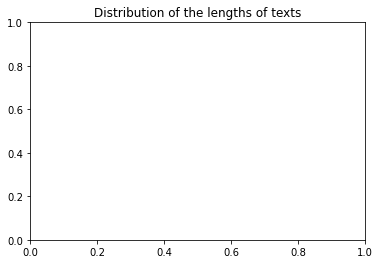

In [28]:
plt.title("Distribution of the lengths of texts")

(array([3.279e+03, 2.012e+03, 6.470e+02, 1.740e+02, 6.200e+01, 4.700e+01,
        3.300e+01, 1.000e+01, 7.000e+00, 3.000e+00, 6.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.00000000e+01, 3.89406667e+03, 7.73813333e+03, 1.15822000e+04,
        1.54262667e+04, 1.92703333e+04, 2.31144000e+04, 2.69584667e+04,
        3.08025333e+04, 3.46466000e+04, 3.84906667e+04, 4.23347333e+04,
        4.61788000e+04, 5.00228667e+04, 5.38669333e+04, 5.77110000e+04,
        6.15550667e+04, 6.53991333e+04, 6.92432000e+04, 7.30872667e+04,
        7.69313333e+04, 8.07754000e+04, 8.46194667e+04, 8.84635333e+04,
        9.23076000e+04, 9.61516667e+04, 9.99957333e+04, 1.03839800e+05,
        1.07683867e+05, 1.11527933e+05, 1.15372000e+05]),
 <BarContainer object of 30 artists>)

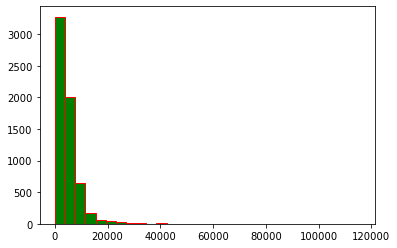

In [29]:
plt.hist(df['length'], bins = 30, color = 'green', edgecolor = 'red')

In [30]:
plt.show()

In [31]:
# Now, let's drop the length column from the dataframe as it's of no actual use in prediction model
df.drop('length', axis = 1, inplace = True)


In [32]:
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [47]:
# Let's get to building the model now
# Feature and target datasets
X = df['text']
y = df['label']

# Splitting the datasets into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [48]:
# Initializing a TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

# Fit and transform train set, transform test set
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)
     

In [49]:
# Initializing a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train)

# Predicting on the train dataset and calculating accuracy
y_train_pred = pac.predict(tfidf_train)
print(f'Accuracy on the train dataset: {round(accuracy_score(y_train, y_train_pred) * 100, 2)}%')

Accuracy on the train dataset: 100.0%


In [50]:
# Confusion matrix on train dataset prediction
confusion_matrix(y_train, y_train_pred)


array([[2173,    0],
       [   0, 2230]], dtype=int64)

In [52]:
# Classification report of the train dataset prediction
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

        FAKE       1.00      1.00      1.00      2173
        REAL       1.00      1.00      1.00      2230

    accuracy                           1.00      4403
   macro avg       1.00      1.00      1.00      4403
weighted avg       1.00      1.00      1.00      4403



In [53]:
# Predicting on the test dataset and calculating accuracy
y_test_pred = pac.predict(tfidf_test)
print(f'Accuracy on the test dataset: {round(accuracy_score(y_test, y_test_pred) * 100, 2)}%')
     

Accuracy on the test dataset: 93.06%


In [54]:

# Confusion matrix on test dataset prediction
confusion_matrix(y_test, y_test_pred)

array([[887,  60],
       [ 71, 869]], dtype=int64)

In [55]:
# Classification report of the test dataset prediction
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

        FAKE       0.93      0.94      0.93       947
        REAL       0.94      0.92      0.93       940

    accuracy                           0.93      1887
   macro avg       0.93      0.93      0.93      1887
weighted avg       0.93      0.93      0.93      1887



In [56]:
# Let's also check predictions with some new data that we manually enter
# You will be asked to enter a random text from a news article as input,
# Then you will be shown if the new is REAL of FAKE
def fake_news_detector():
  random_news = [input(f"{'='*80}\nEnter the news here: ")]
  tfidf_random_news = tfidf.transform(random_news)

  random_pred = pac.predict(tfidf_random_news)
  print(f'\nThe news you entered is: {random_pred[0]}')

while True:
  fake_news_detector()

  ask_user = input("\nDo you want to check another news that you have? Choose y/n: ").lower()

  print()
  if (ask_user == "n"):
    break
     

Enter the news here: "Congratulations! You have just won a grand reward of $1000000, click this link to enter you bank details and claim your cash prize instantly!!!"

The news you entered is: FAKE

Do you want to check another news that you have? Choose y/n: y

Enter the news here: "Congratulations! You have just won a grand reward of $1000000, click this link to enter you bank details and claim your cash prize instantly!!!"

The news you entered is: FAKE

Do you want to check another news that you have? Choose y/n: n

